In [3]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, ExpSineSquared, Sum, Product

import sys
sys.path.append("..")
from mcpm.kernels import *

np.random.seed(1)

## Functions

In [4]:
def gram_matrix(x1,x2,k):
    init_op = tf.initialize_all_variables()
    with tf.Session() as sess:
        sess.run(init_op)
        k = sess.run(k.kernel(x1,x2))
    return k

# GP function
def GP(a , b, k, mu, kernel, samples) :
    f = np.random.multivariate_normal(mu.flatten(), kernel(a, b, k) , samples)
    return f

## Input Data

In [5]:
# Input data
#x0 = np.zeros(1000).reshape(1000,1).astype('float32')
#x = np.linspace(0,2,1000).reshape(-1,1).astype('float32')

x1 = np.linspace(0.0,5.0,50)
x2 = np.linspace(0.0,2.0,50)
x1,x2 = np.meshgrid(x1,x2)
inputs = np.array([x1.flatten(),x2.flatten()]).astype('float32').T

mean = np.zeros(2500)

## Initialising Kernels

In [14]:
# Non-Stationary Matern-32 & Periodic Kernels
NS_M32_Periodic_Product = Separable_Product(input_dim=1, inducing_inputs=inputs , spatial_kernel="NS_Matern_3_2", temporal_kernel="Periodic", num_latent=2 , 
                                         lengthscale = 1.0, std_dev = 1.0, white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, 
                                         num_components=1, weights=[[1.0]], means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

NS_M32_Periodic_Sum = Separable_Sum(input_dim=1, inducing_inputs=inputs , spatial_kernel="NS_Matern_3_2", temporal_kernel="Periodic", num_latent=2 , 
                                         lengthscale = 1.0, std_dev = 1.0, white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, 
                                         num_components=1, weights=[[1.0]], means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

# Non-Stationary Matern-32 & Spectral Mixture Kernels
NS_M32_SM_Product = Separable_Product(input_dim=1, inducing_inputs=inputs , spatial_kernel="NS_Matern_3_2", temporal_kernel="SpectralMixture", num_latent=2 , 
                                         lengthscale = 1.0, std_dev = 1.0, white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, 
                                         num_components=1, weights=[[1.0]], means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)

NS_M32_SM_Sum = Separable_Sum(input_dim=1, inducing_inputs=inputs , spatial_kernel="NS_Matern_3_2", temporal_kernel="SpectralMixture", num_latent=2 , 
                                         lengthscale = 1.0, std_dev = 1.0, white = 0.01, input_scaling = False, period = 1.0, num_dimensions=1, 
                                         num_components=1, weights=[[1.0]], means=None, var_scale=1.0, mean_scale=1.0, init=False, mask=None)


## Non Stationary Matern & Periodic

E0903 11:05:34.857572 68076 tf_should_use.py:71] ==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'init_5' type=NoOp>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_l

Text(0.5, 0, 'Value')

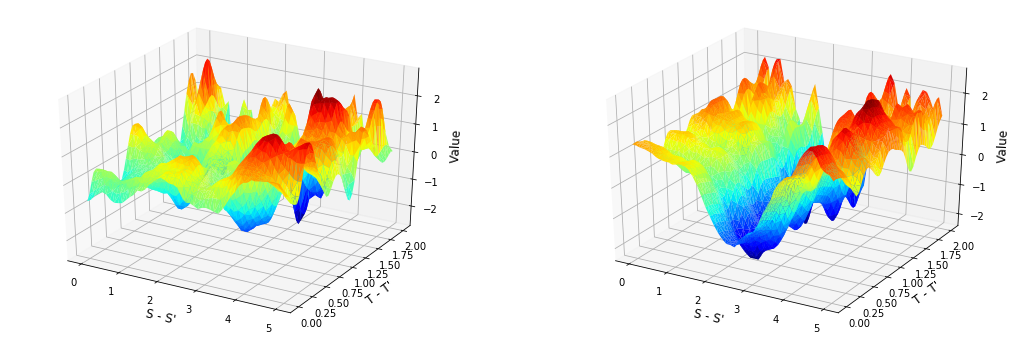

In [11]:
# Sample from GP
sample1 = GP(inputs, inputs, NS_M32_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, NS_M32_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample1, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Non Stationary Matern & Spectral Mixture

E0903 11:10:03.762449 68076 tf_should_use.py:71] ==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'init_9' type=NoOp>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "C:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_l

Text(0.5, 0, 'Value')

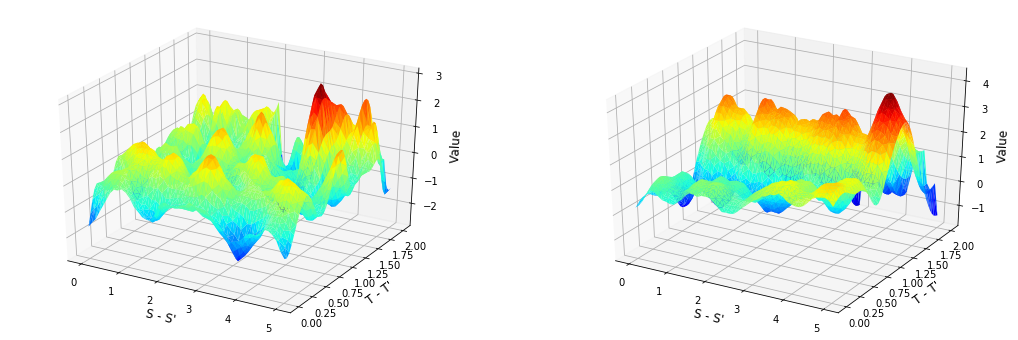

In [15]:
# Sample from GP
sample1 = GP(inputs, inputs, NS_M32_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, NS_M32_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample1, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-3/2 & Periodic

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

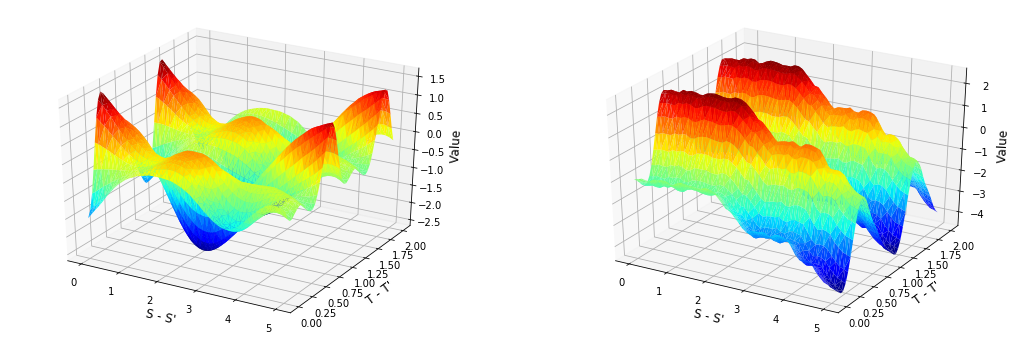

In [18]:
# Sample from GP
sample1 = GP(inputs, inputs, M32_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M32_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-3/2 & Spectral Mixture

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

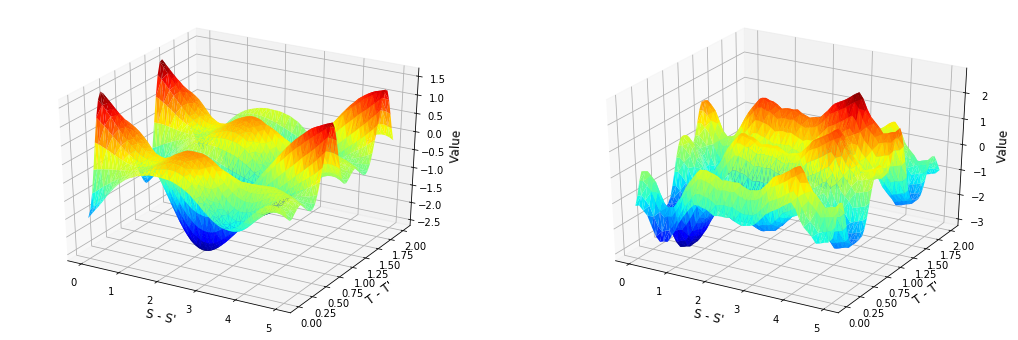

In [19]:
# Sample from GP
sample1 = GP(inputs, inputs, M32_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M32_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-5/2 & Periodic

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

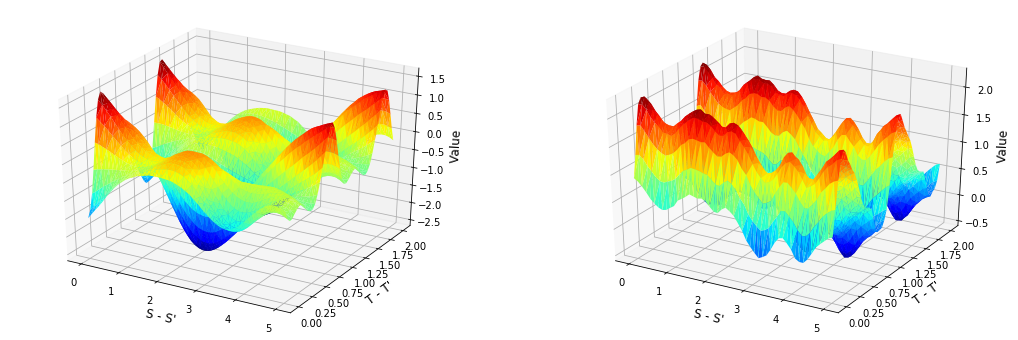

In [20]:
# Sample from GP
sample1 = GP(inputs, inputs, M52_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M52_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Matern-5/2 & Spectral Mixture

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

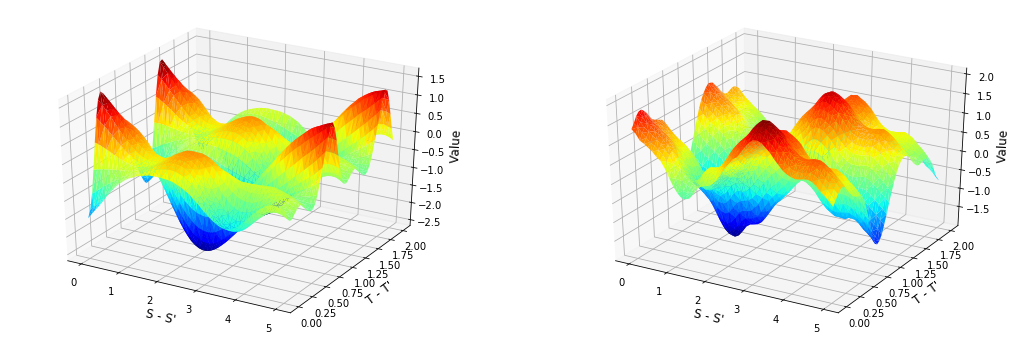

In [21]:
# Sample from GP
sample1 = GP(inputs, inputs, M52_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, M52_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Exponential & Periodic

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

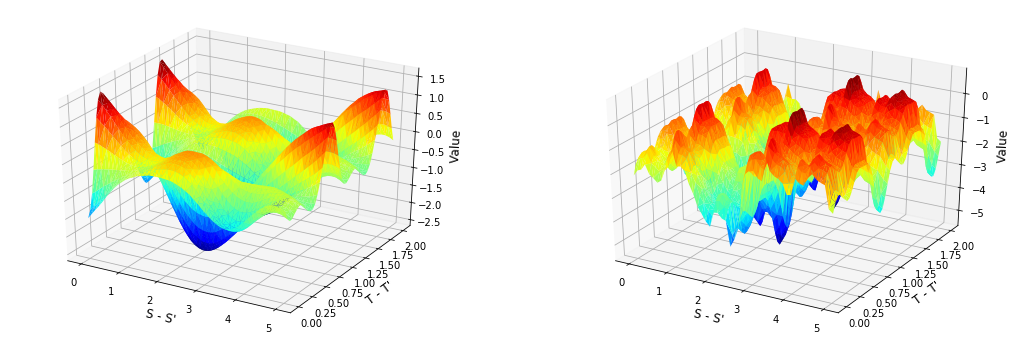

In [22]:
# Sample from GP
sample1 = GP(inputs, inputs, Exp_Periodic_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, Exp_Periodic_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')

## Exponential & Spectral Mixture

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Value')

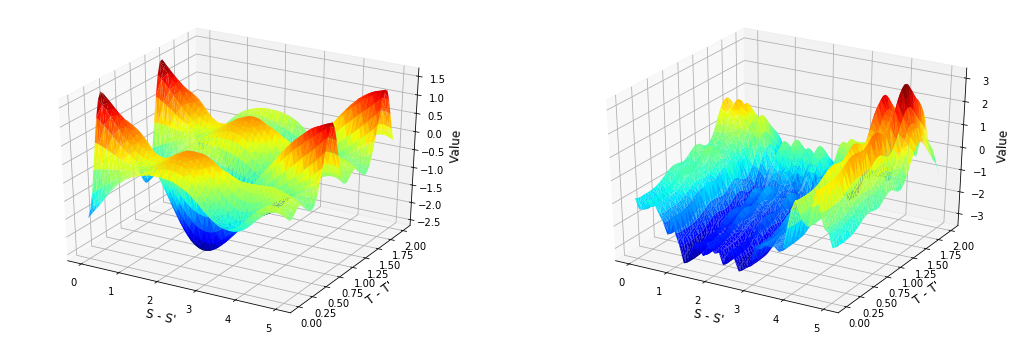

In [23]:
# Sample from GP
sample1 = GP(inputs, inputs, Exp_SM_Product, mean, gram_matrix, 1).reshape(2500,)
sample2 = GP(inputs, inputs, Exp_SM_Sum, mean, gram_matrix, 1).reshape(2500,)

# Plotting sample
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot_trisurf(inputs[:,0], inputs[:,1], sample, cmap=plt.cm.jet, linewidth=0)
ax1.set_xlabel("S - S'", fontsize='large')
ax1.set_ylabel("T - T'", fontsize='large')
ax1.set_zlabel('Value', fontsize='large')

ax2.plot_trisurf(inputs[:,0], inputs[:,1], sample2, cmap=plt.cm.jet, linewidth=0)
ax2.set_xlabel("S - S'", fontsize='large')
ax2.set_ylabel("T - T'", fontsize='large')
ax2.set_zlabel('Value', fontsize='large')